In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
os.chdir(r'C:\Users\prana\Desktop')
df = pd.read_csv(r'C:\Users\prana\Desktop\devOPS\datasets\AV_loan_train.csv')
df_test = pd.read_csv(r'C:\Users\prana\Desktop\devOPS\datasets\AV_loan_test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking for empty values

## Uni-Variate Analysis

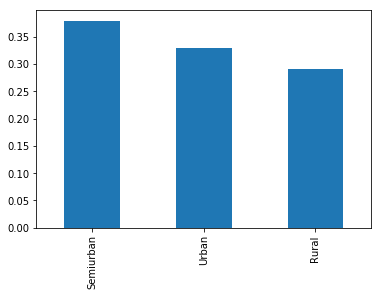

In [2]:
df['Property_Area'].value_counts(normalize=True).plot.bar()

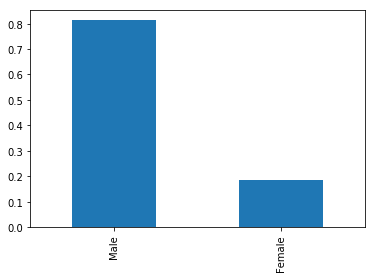

In [3]:
df['Gender'].value_counts(normalize=True).plot.bar()

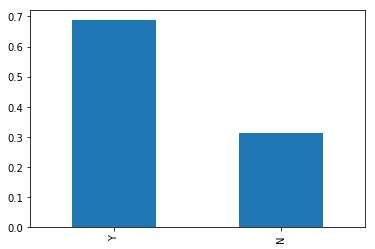

In [4]:
df['Loan_Status'].value_counts(normalize=True).plot.bar()

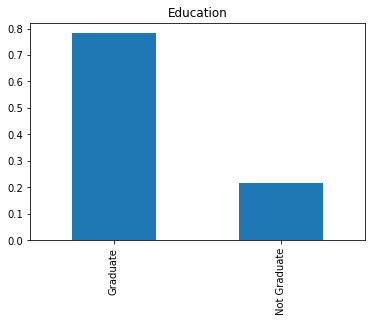

In [5]:
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
# normalize = True gives us easy %age values on the y axis


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


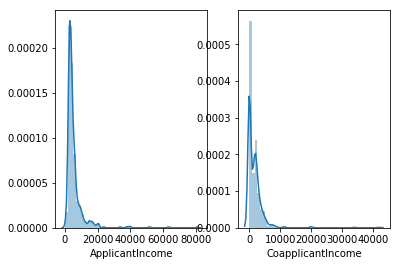

In [6]:
plt.subplot(121)
sns.distplot(df[('ApplicantIncome')])

plt.subplot(122)
sns.distplot(df[('CoapplicantIncome')])


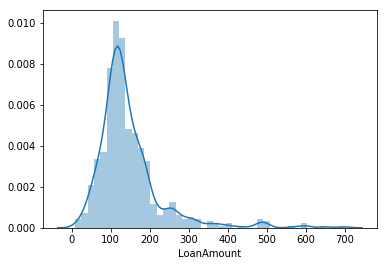

In [7]:
df1 = df
sns.distplot(df1['LoanAmount'].dropna())

## Univariate Analysis - insights

* Majority of the applicants are graduates (~80%)
* Both Applicant-Income and Loan Amount approximately follow normal distribution with a lot of **OUTLIERS** on the right
* Given, most of the applicants are graduates. that has also resulted in 70% of loans being sanctioned - this fact will be   tested in Bivariate Analysis


# Bivariate Analysis
## a) Categorical/Discrete Data

### 1. Gender vs Loan Status

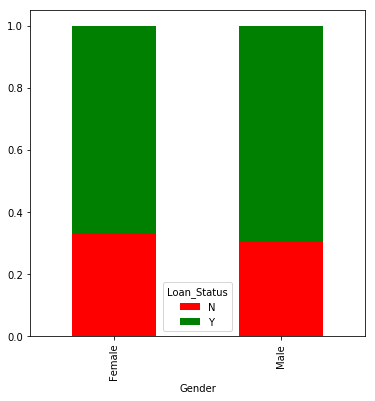

In [8]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### 2. Area Type vs Loan Status

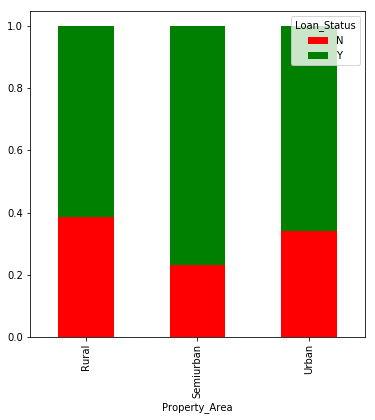

In [9]:
Area=pd.crosstab(df['Property_Area'],df['Loan_Status']) 
Area.div(Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### 3. Credit History vs Loan Status

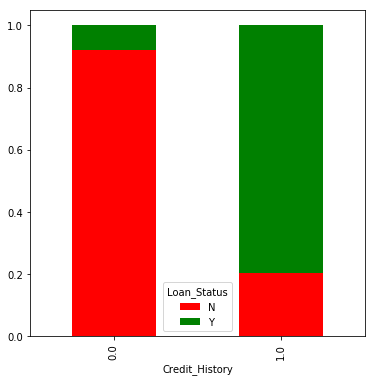

In [10]:
cred=pd.crosstab(df['Credit_History'],df['Loan_Status']) 
cred.div(cred.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### 4. Education vs Loan Status

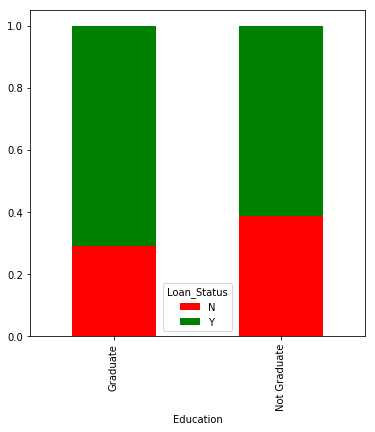

In [11]:
edu=pd.crosstab(df['Education'],df['Loan_Status']) 
edu.div(edu.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

### No of Dependents vs Loan Status

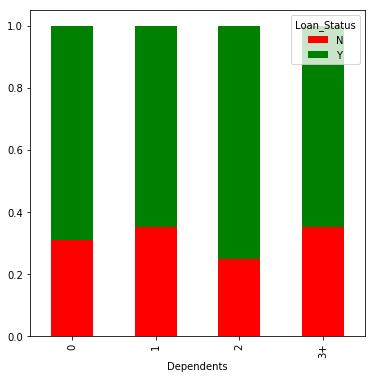

In [12]:
depno=pd.crosstab(df['Dependents'],df['Loan_Status']) 
depno.div(depno.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

## Bivariate Insights - Categorical/Discrete Data

* Although % of Male getting their loan amount sanctioned is marginally higher than their female counterparts, considering the number of males in the dataset from univariate analysis, we can say **Gender has very little to do with Loan Staus atleast in this dataset**.

* **Semi-urban** area type seems to have **higher loan sanction percentage** when compared to rural and urban areas

* This is a no brainer, people with a good credit history have a better loan sanction percentage.

* Graduates fare mariginally better when compared to not graduate

* **no of dependents = 2** has the highest loan sanction percentage while 1,3 are the least sanctioned


## Bi-Variate Analysis - Numerical Data
### 1. Applicant Income

Text(0, 0.5, 'Percentage')

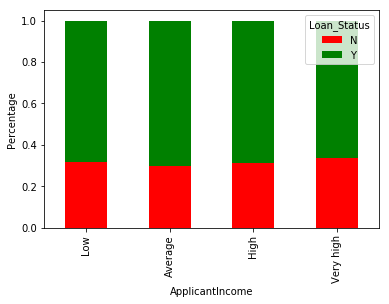

In [13]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,color = ['r','g']) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

### 2. Total Income

Text(0, 0.5, 'Percentage')

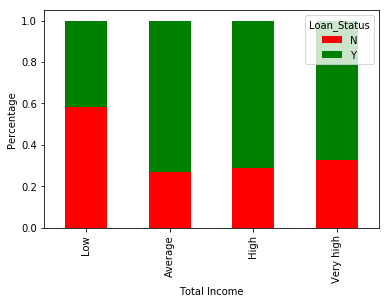

In [14]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,color = ['r','g']) 
plt.xlabel('Total Income') 
plt.ylabel('Percentage')

In [15]:
df_train = df
#df_train=df_train.drop(['Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df_train['Dependents'].replace('3+', 3,inplace=True) 
df_test['Dependents'].replace('3+', 3,inplace=True) 
df_train['Loan_Status'].replace('N', 0,inplace=True) 
df_train['Loan_Status'].replace('Y', 1,inplace=True)

## Correlation Matrix

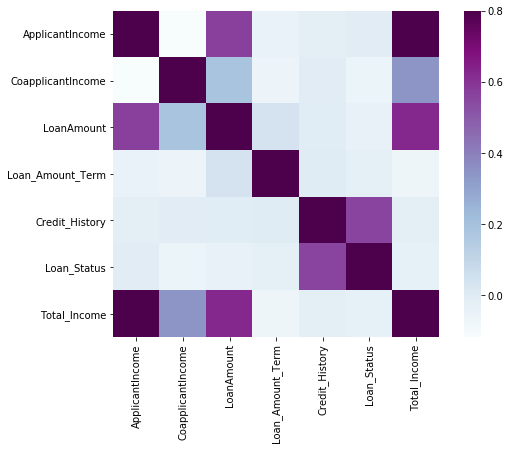

In [16]:
matrix = df_train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

## Insights

* Credit History and Loan Status are correlated
* So is Loan Amount and Loan Status from the matrix
* Loan Amount and Co Applicant Income are also relatively correlated

## Cleaning Data

In [17]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
Total_Income          0
Total_Income_bin      0
dtype: int64

## Categorical Variables - Imputation by Mode

In [18]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True) 
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True) 
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)

## Numerical Variable(s) - Imputation by Median

In [19]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

In [20]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
Total_Income         0
Total_Income_bin     0
dtype: int64

## Imputation for test data

In [21]:
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True) 
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) 
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) 
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True) 
df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True) 
df_test['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

## Rectifying 'Right Skewness' - Outlier Treatment
### Through Log Transformation

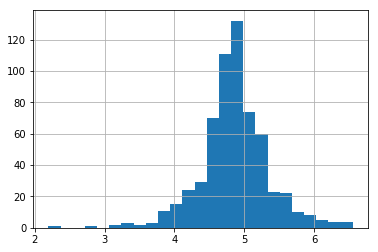

In [22]:
import numpy as np
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=25)

# Building the Model
## Logistic Regression using Stratified K-Fold

### 1. Pre-processing variables

In [23]:
df_train=df_train.drop(['Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df_train=df_train.drop('Loan_ID',axis=1) 
df_test=df_test.drop('Loan_ID',axis=1)
df_train = df_train.drop('LoanAmount',axis=1)
df_test = df_test.drop('LoanAmount',axis=1)
X = df_train.drop('Loan_Status',1) 
y = df_train.Loan_Status
X=pd.get_dummies(X) 
df_train=pd.get_dummies(df_train) 
df_test=pd.get_dummies(df_test)

In [31]:
df_test.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log
0,1.0,4.700480,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,8.651724
1,1.0,4.836282,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8.428581
2,1.0,5.337538,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,8.824678
3,1.0,4.605170,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,8.494129
4,1.0,4.356709,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,8.094378


In [32]:
df_train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log
0,1.0,1,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,8.674026
1,1.0,0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,8.714568
2,1.0,1,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,8.006368
3,1.0,1,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,8.505323
4,1.0,1,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,8.699515


# Feature Engineering
### 1. Total Income Column and Log(Total Income) Column

In [26]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome'] 
df_test['Total_Income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_train['Total_Income_log'] = np.log(df_train['Total_Income'])  
df_test['Total_Income_log'] = np.log(df_test['Total_Income'])

## Removing highly correlated features (Incomes) to reduce noise

In [28]:
df_train=df_train.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','Total_Income'], axis=1) 
df_test=df_test.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','Total_Income'], axis=1)

## 2. Stratified KFold - 0.7777

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
X = df_train.drop('Loan_Status',1)
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model1 = LogisticRegression(random_state=1,solver='lbfgs',max_iter=15000)     
    model1.fit(xtr, ytr)     
    pred_test1 = model1.predict(xvl)    
    score = accuracy_score(yvl,pred_test1)     
    print('accuracy_score',score)    
    i+=1
    
pred_test1 = model1.predict(df_test)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


### 3. Plotting the ROC curve

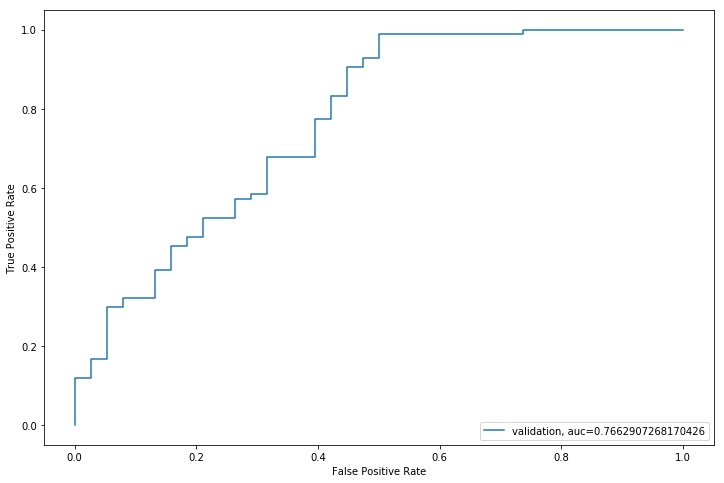

In [36]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

## AUC = 0.7662907

## SKF Linear SVC (from sklearn flowchart for <100k samples) - 0.77777

In [38]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
X_f = X
y_f = y
scaler = StandardScaler()
scaler.fit(X_f)
scaler.transform(X_f)
i=1 
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_f,y_f):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LinearSVC(max_iter = 100000)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)    
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)    
    i+=1

pred_test2 = model.predict(df_test) 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys



1 of kfold 10
accuracy_score 0.7777777777777778

2 of kfold 10
accuracy_score 0.8095238095238095

3 of kfold 10
accuracy_score 0.8360655737704918

4 of kfold 10
accuracy_score 0.8360655737704918

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.8360655737704918

7 of kfold 10
accuracy_score 0.8032786885245902

8 of kfold 10
accuracy_score 0.7704918032786885

9 of kfold 10
accuracy_score 0.819672131147541

10 of kfold 10
accuracy_score 0.8360655737704918


## Random Forest approach - 0.715277

In [41]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test3 = model.predict(df_test)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.7983870967741935

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.8278688524590164


C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest

## Tuning the Hyper-params of RandomForest using GridSearch

In [55]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
            criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False),       
            fit_params=None, iid=True, n_jobs=1, param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 
                                                            'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
            pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
            scoring=None, verbose=0)
# Estimating the optimized value 
grid_search.best_estimator_


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

## Random Forest using tuned hyper-params - 0.7638

In [76]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)     
    model2.fit(xtr, ytr)     
    pred_test = model2.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test4 = model2.predict(df_test)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.7950819672131147


### Best Features

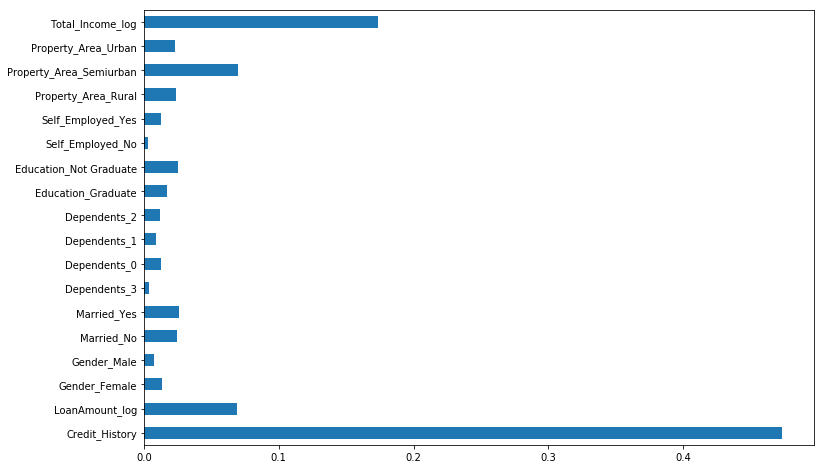

In [47]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

## XGBoost Classifier - 0.729

In [49]:
from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test5 = model.predict(df_test)


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.8032786885245902


## Hyper-param tuning of XGBoost Classifier
 

In [62]:
paramgrid = {
 'max_depth':range(3,30,2),
 'min_child_weight':range(1,20,2)
}
grid_search=GridSearchCV(XGBClassifier(random_state=1),paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise', estimator=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1,
             silent=None, objective='binary:logistic', booster='gbtree',
             n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
             max_delta_step=0, subsample=1, colsample_bytree=1, 
             colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, 
            reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=1, 
            seed=None, missing=None),fit_params=None, iid=False, n_jobs=1, param_grid={'max_depth': [3, 5, 7, 9,11,13,15,17,19,21,23,25,27,29],
                                                     'min_child_weight': [1, 3, 5,7,9,11,13,15,17,19]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
            scoring=None, verbose=0)
grid_search.best_estimator_


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## XGBClassifier after param tuning - 0.73611

In [71]:
i=1 
X_f = X
y_f = y
scaler = StandardScaler()
scaler.fit(X_f)
scaler.transform(X_f)
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_f,y_f):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test6 = model.predict(df_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  



1 of kfold 7
accuracy_score 0.8089887640449438

2 of kfold 7
accuracy_score 0.8089887640449438

3 of kfold 7
accuracy_score 0.7840909090909091

4 of kfold 7
accuracy_score 0.735632183908046

5 of kfold 7
accuracy_score 0.8160919540229885

6 of kfold 7
accuracy_score 0.7701149425287356

7 of kfold 7
accuracy_score 0.8390804597701149


## AdaBoost - 0.7030

In [68]:
from sklearn.ensemble import AdaBoostClassifier
i=1
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X_f,y_f):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model =  AdaBoostClassifier(n_estimators=100)   
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test7 = model.predict(df_test)


1 of kfold 7
accuracy_score 0.7865168539325843

2 of kfold 7
accuracy_score 0.7752808988764045

3 of kfold 7
accuracy_score 0.7727272727272727

4 of kfold 7
accuracy_score 0.735632183908046

5 of kfold 7
accuracy_score 0.7816091954022989

6 of kfold 7
accuracy_score 0.7586206896551724

7 of kfold 7
accuracy_score 0.8505747126436781


## Splitting training data into train and test

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

## Stacking

In [167]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((0,1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [168]:
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [169]:
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [170]:
df_train_stack = pd.concat([train_pred1, train_pred2], axis=1)
df_test_stack = pd.concat([test_pred1, test_pred2], axis=1)
model_stack = LogisticRegression(random_state=1,solver='lbfgs',max_iter=15000)
model_stack.fit(df_train_stack,y_train)
model_stack.score(df_test_stack, y_test)

0.827027027027027

## Custom X features and Logistic Regression

In [187]:
X_Train = df_train[['Credit_History','LoanAmount_log','Total_Income_log']]
Y_Train = df_train[['Loan_Status']]
X_Test = df_test[['Credit_History','LoanAmount_log','Total_Income_log']]

x_train, x_test, y_train, y_test = train_test_split(X_Train,Y_Train, test_size =0.3)

model_cust = LogisticRegression(random_state=1,solver='lbfgs',max_iter=15000)     
model_cust.fit(x_train,y_train)
pred_test = model_cust.predict(x_test)     
score = accuracy_score(y_test,pred_test)     
print('accuracy_score',score)
    
pred_test_cust = model_cust.predict(X_Test)

accuracy_score 0.8


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Custom X features and XGB

In [196]:

model_cust =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0001, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)      
model_cust.fit(x_train,y_train)
pred_test = model_cust.predict(x_test)     
score = accuracy_score(y_test,pred_test)     
print('accuracy_score',score)
    
pred_test_cust = model_cust.predict(X_Test)

accuracy_score 0.7945945945945946


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Submission (Final piece of cell to be run after every different model)

In [197]:
submission=pd.read_csv(r'C:\Users\prana\Desktop\devOPS\datasets\AV_loan_sample_submission.csv')
submission['Loan_Status']=pred_test_cust
df_test2 = pd.read_csv(r'C:\Users\prana\Desktop\devOPS\datasets\AV_loan_test.csv')
submission['Loan_ID']=df_test2['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(r'C:\Users\prana\Desktop\devOPS\datasets\cust_feat_XGB.csv',index=False)